data import and preprocess

In [26]:
import torch as t
from torch.autograd import Variable
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

In [12]:
trainset = tv.datasets.CIFAR10(
    root=r'C:/Users/studentx/',
    train=True,
    download=True,
    transform=transform
)

Files already downloaded and verified


In [13]:
trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

In [14]:
testset = tv.datasets.CIFAR10(
    r'C:/Users/studentx/',
    train=False,
    download=True,
    transform=transform
)

testloader = t.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

Files already downloaded and verified


In [15]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truch')

ship


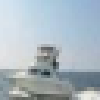

In [16]:
(data, label) = trainset[100]
print(classes[label])
show((data+1)/2).resize((100,100))

        car        frog         car       plane


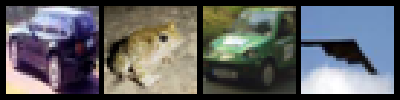

In [18]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

define network

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16,5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


define loss and optimizer

In [20]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

train network

In [44]:
for epoch in range(12):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss+=loss.data
        if i%2000==1999:
            print('[%d, %5d] loss: %.3f'\
                 % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('finished training')    

[1,  2000] loss: 0.895
[1,  4000] loss: 0.925
[1,  6000] loss: 0.940
[1,  8000] loss: 0.944
[1, 10000] loss: 0.922
[1, 12000] loss: 0.953
[2,  2000] loss: 0.841
[2,  4000] loss: 0.878
[2,  6000] loss: 0.887
[2,  8000] loss: 0.899
[2, 10000] loss: 0.906
[2, 12000] loss: 0.941
[3,  2000] loss: 0.828
[3,  4000] loss: 0.842
[3,  6000] loss: 0.849
[3,  8000] loss: 0.888
[3, 10000] loss: 0.872
[3, 12000] loss: 0.881
[4,  2000] loss: 0.795
[4,  4000] loss: 0.811
[4,  6000] loss: 0.829
[4,  8000] loss: 0.839
[4, 10000] loss: 0.838
[4, 12000] loss: 0.869
[5,  2000] loss: 0.744
[5,  4000] loss: 0.785
[5,  6000] loss: 0.794
[5,  8000] loss: 0.829
[5, 10000] loss: 0.849
[5, 12000] loss: 0.860
[6,  2000] loss: 0.723
[6,  4000] loss: 0.770
[6,  6000] loss: 0.797
[6,  8000] loss: 0.799
[6, 10000] loss: 0.801
[6, 12000] loss: 0.823
[7,  2000] loss: 0.695
[7,  4000] loss: 0.749
[7,  6000] loss: 0.763
[7,  8000] loss: 0.790
[7, 10000] loss: 0.785
[7, 12000] loss: 0.798
[8,  2000] loss: 0.681
[8,  4000] 

        cat        ship        ship       plane


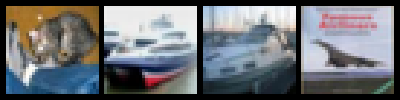

In [45]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [46]:
outputs = net(Variable(images))
_, predicted = t.max(outputs.data, 1)
print(' '.join('%5s'% classes[predicted[j]] for j in range(4)))

  cat  ship plane  ship


In [47]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print(100*correct/total)

tensor(59)
